In [11]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [12]:
# model parameters

m_s = 50 #in kg (weight of rocket shell)
g = 9.81 #in m/s^2
rho = 1.901 #in kg/m^3 (average air density throughout flight, assumed constant)
r = 0.5 #in m
A = numpy.pi*(r**2) #maximum cross sectional area of the rocket
v_e = 325 #in m/s (exhaust speed)
C_D = 0.15 #Drag coefficient
m_po = 100 #in kg at time t=0, initial weight of the rocket propellant

#initial conditions
v0 = 0.0
h0 = 0.0
m_p0 = 100.0

In [13]:
T = 5  #final time
dt = 0.1  #time increment
N = int(T/dt) + 1  #number of time-steps
t = numpy.linspace(0, T, N)
u = numpy.empty((N, 3))

In [31]:
#initialize m_p, h, and v arrays

m_p = numpy.zeros_like(t)
#m_pdot = numpy.zeros_like(t)
h = numpy.zeros_like(t)
v = numpy.zeros_like(t)

In [33]:
#set up integral for m_p:
m_p[0] = m_p0

for j in range(N-1):
    if m_p[j] < 0.:   
        m_p[j]=0.
    else:
        m_pdot = 20.*dt 
        m_p[j+1] = m_p[j]- m_pdot   
       
       
print(m_pdot)
print(m_p)
print(t)

2.0
[ 100.   98.   96.   94.   92.   90.   88.   86.   84.   82.   80.   78.
   76.   74.   72.   70.   68.   66.   64.   62.   60.   58.   56.   54.
   52.   50.   48.   46.   44.   42.   40.   38.   36.   34.   32.   30.
   28.   26.   24.   22.   20.   18.   16.   14.   12.   10.    8.    6.
    4.    2.    0.]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5. ]


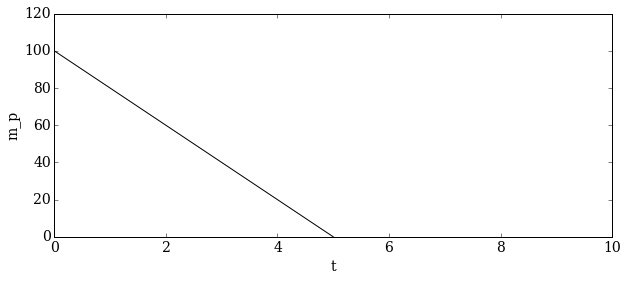

In [40]:
#plot m_p vs time

pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(0,120) #y-axis plot limits
pyplot.xlim(0,10)
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('m_p', fontsize=14) #y label
pyplot.plot(t,m_p, 'k-');

In [35]:
#def euler_step(u, f, dt):
    #return u + dt * f(u)

In [36]:

'''    
def f(u):
    v = u[0]
    h = u[1]
#   m_p = u[2]
    
    x = numpy.array([-g + (1/(m_s+m_p))*(m_pdot*v_e)-((1/(m_s+m_p))*(.5*rho*v*abs(v)*A*C_D)), v])
        
   
    return x
'''

'    \ndef f(u):\n    v = u[0]\n    h = u[1]\n#   m_p = u[2]\n    \n    x = numpy.array([-g + (1/(m_s+m_p))*(m_pdot*v_e)-((1/(m_s+m_p))*(.5*rho*v*abs(v)*A*C_D)), v])\n        \n   \n    return x\n'

In [38]:
h[0] = h0
v[0] = v0

for n in range (N-1):
    
    '''
    u[0] = numpy.array([v0, h0, m_p0])
     
    u[n+1] = euler_step(u[n], f, dt)
    
    '''
   
    v[n+1] = (-g + ((m_pdot*v_e)/(m_s+m_p[n])) - 0.5*((rho*v[n]*numpy.abs(v[n])*A*C_D)/(m_s + m_p[n])))*dt + v[n]
    
    h[n+1] = h[n] + dt*v[n]

    if h[n+1] < 0:
        #htest = h[n+1, 1]
        break
        
    '''
    if htest > hmax:

        hmax = htest

        print('Altitude:')
        print(htest)
    '''

In [39]:
print('v:')
print(v)
print()
print('h:')
print(h)
print(t)

v:
[ 0.         -0.54766667 -1.08945478  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ]

h:
[ 0.          0.         -0.05476667  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.   